In [5]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [6]:
df = pd.read_csv('clean_data_scaled.csv')
X = df[["Type","Air.temperature","Process.temperature","Rotational.speed", "Torque", "Tool.wear"]]
y = df["Machine.failure"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True)


svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_rec_scores = cross_val_score(svm_model, X, y, cv =5, scoring="recall")
svm_acc_scores = cross_val_score(svm_model, X, y, cv =5, scoring="accuracy")

print(classification_report(y_test, y_pred_svm))

# print('SVM Model accuracy: ',np.mean(svm_acc_scores))
# print('SVM Model recall: ',np.mean(svm_rec_scores))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2412
           1       0.90      0.22      0.35        88

    accuracy                           0.97      2500
   macro avg       0.94      0.61      0.67      2500
weighted avg       0.97      0.97      0.96      2500



[[2410    2]
 [  69   19]]


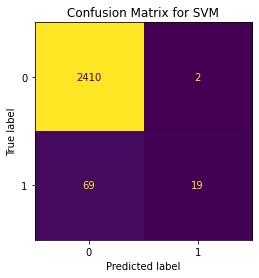

In [7]:
disp = metrics.plot_confusion_matrix(svm_model, X_test, y_test, colorbar=False)

plt.title("Confusion Matrix for SVM")

print(disp.confusion_matrix)
